<a href="https://colab.research.google.com/github/gabriellaeun/machine_learning/blob/main/Learning_Tensorflow_Ch3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
# !pip uninstall tensorflow

In [43]:
!pip install tensorflow==1.15

# How TensorFlow is built, How it works



*   computation library using **dataflow graphs**

1.   Manage & Create Graph 
2.   Introduce 'Building Blocks' - constants, placeholder, Variables





# Computation Graph란?



*   상호 연결된 entity들을 갖는데 이를 node 혹은 vertix라 함
    - node들은 edge로 연결되어 있음
    - dataflow graph에서 edge는 data가 하나의 노드에서 다른 노드로 흐를 수 있게 함
    
*   Tensorflow에서 그래프 노드 각각은 연산을 나타냄
    - input을 주면 output이 생기고 이 output이 다른 노드를 통과하게 됨
    - 그래프에 있는 연산은 모든 종류의 함수를 포함한다.(단순~복잡)
      creation of summaries, generating constant values ... 포함



# Computation Graph의 장점은?



*   Tensorflow는 graph를 토대로 계산을 최적화한다.


*   direct dependency (직접 의존)
    - node y의 input이 node x의 output에 영향을 받으면 node y가 node x에 의존한다고 하고 두 노드가 edge로 연결되어 있으면 이를 direct dependency라 함
*   indirect dependency (간접 의존)
    - 직접 의존과 반대로 edge로 연결되어 있지 않으면 이를 indirect dependency라 함
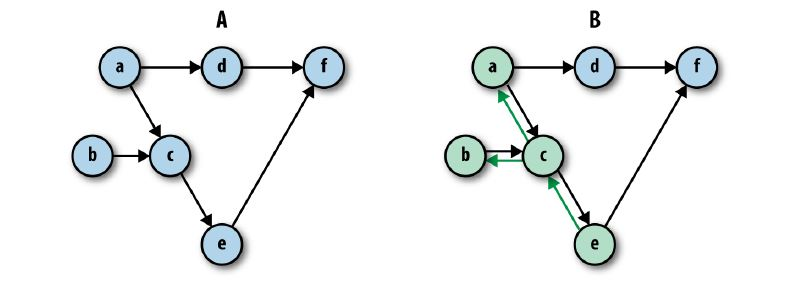

A에서 보면 e 노드는 c와는 직접 의존 상태이고, a와는 간접 의존, d와는 독립 관계이다.






# Graph, Session, Fetch


Tenorflow 작동은 크게 보면 두 개의 단계로 나눠볼 수 있다.
1. 그래프 만들기
2. 만든 그래프 실행시키기 


# Creating a Graph


*   tf.< operator > 사용
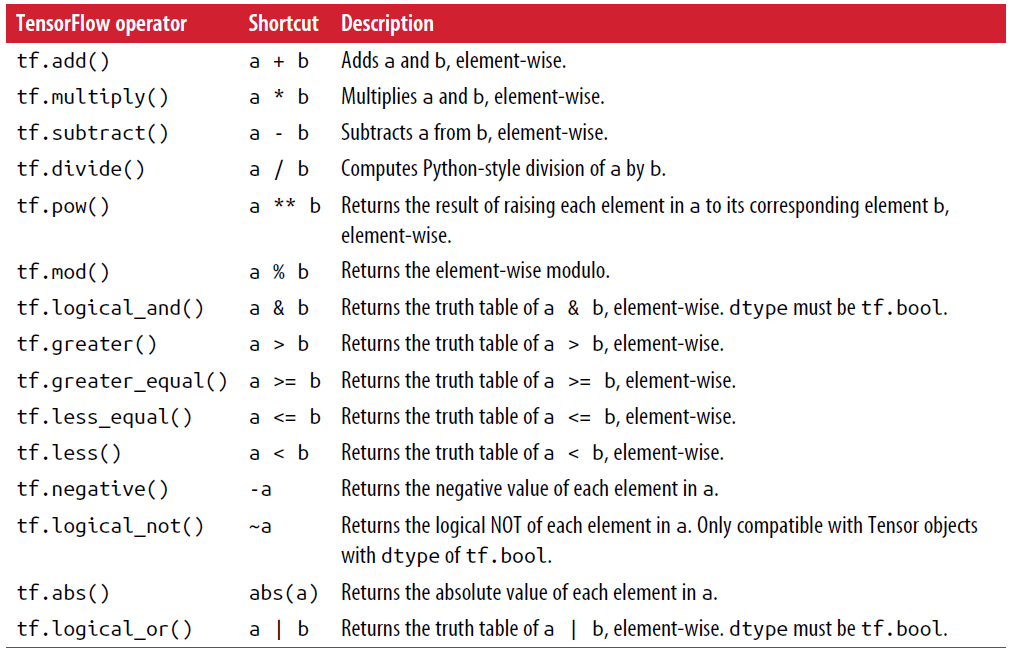



In [44]:
import tensorflow as tf

In [45]:
# output a constant value
a = tf.constant(5)
b = tf.constant(2)
c = tf.constant(3)

In [46]:
# 2개 inputs & 간단한 산술연산
d = tf.multiply(a, b)
e = tf.add(c, b)
f = tf.subtract(d, e)

# Creating a Session and Running It



*   computations을 run하기 위해서 Session을 Create하고 Run 해야한다.



In [47]:
sess = tf.Session() # Session : TensorFlow API의 일부분인데, Python object와 data 간의 communication
outs = sess.run(f) # 실행하는 것은 run() 메소드를 통해 완료됨
sess.close() # 완료된 후에는 session을 닫아주는 것이 좋다
print("outs = {}".format(outs))

outs = 5


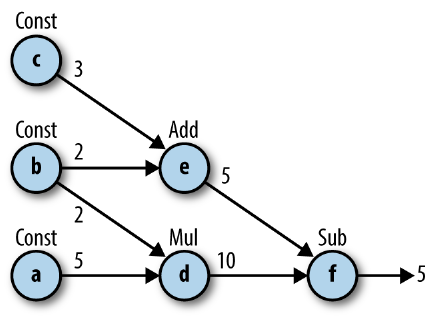

# examples 3-1
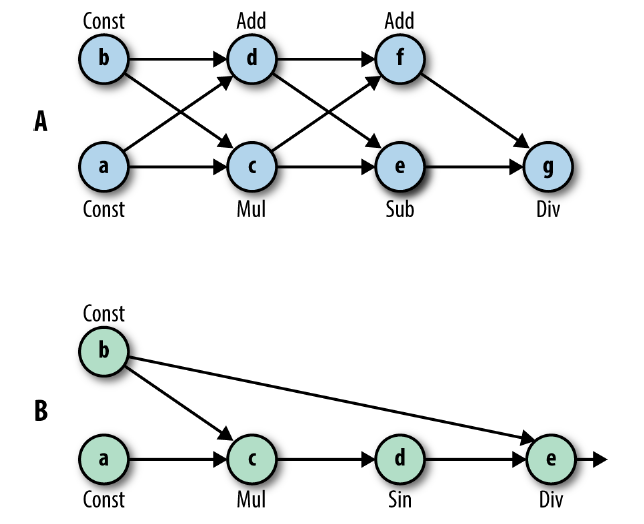

In [48]:
a = tf.constant(3)
b = tf.constant(6)

sess = tf.Session()
c = tf.multiply(a, b)
d = tf.add(a, b)
f = tf.add(c, d)
e = tf.subtract(c, d)
g = tf.divide(e, f)

sess = tf.Session()
outs = sess.run(g)
sess.close()
print("outs = {}".format(outs))

outs = 0.3333333333333333


In [49]:
a = tf.constant(3.0)
b = tf.constant(6.0)

c = tf.multiply(a, b)
d = tf.sin(c)
e = tf.divide(b, d)

sess = tf.Session()
outs = sess.run(e)
sess.close()
print("outs = {}".format(outs))

outs = -7.98948335647583


# Constructing and Managing Graph
*  tensorflow를 import하면 default graph가 자동으로 생성됨을 기억하자!
*  추가적인 그래프 생성 및 control 가능
*  tf.Graph() 는 새로운 그래프를 생성
*  operation은 default 그래프와 연관되어 있음

In [50]:
# default로 자동으로 생성되는 그래프 외에 다른 그래프를 생성해보는 예제

import tensorflow as tf
print(tf.get_default_graph()) #tf.get_default_graph()를 하면 default로 자동으로 생긴 그래프를 확인할 수 있음

g = tf.Graph()
print(g)

결과를 보면 tf.Graph()는 한 번 했지만, 두 개의 다른 그래프가 있는 것을 확인할 수 있다.
이는 default로 존재하는 그래프가 하나 자동으로 생겨서 존재하기 때문이다.

In [51]:
g = tf.Graph()
a = tf.constant(5)

print(a.graph is g)
print(a.graph is tf.get_default_graph())

False
True


연산(a)는 default 그래프와 연관되어 있는 것을 확인 가능

#  The with statement
*  method(context manager에 정의되어 있음)를 통해 block의 실행을 wrap!
*  with는 세션을 종료할 필요 없이 시작할 수 있음

In [52]:
# 그래프를 set up 하고 모든 코드가 그래프의 context에서 수행되는지 확인하는데 with를 사용함

g1 = tf.get_default_graph()
g2 = tf.Graph()

print(g1 is tf.get_default_graph())

with g2.as_default(): # .as_default는 해당 그래프를 default로 만들어주는 명령어
  print(g1 is tf.get_default_graph())

print(g1 is tf.get_default_graph())

True
False
True


#  Fetch (가져옴)
*  sess.run() 이런게 fetches

In [53]:
a = tf.constant(5)
b = tf.constant(2)
c = tf.constant(3)
d = tf.multiply(a, b)
e = tf.add(c, b)
f = tf.subtract(d, e)

with tf.Session() as sess:
  fetches = [a, b, c, d, e, f]
  outs = sess.run(fetches)

print("outs = {}".format(outs))
print(type(outs[0]))

outs = [5, 2, 3, 10, 5, 5]
<class 'numpy.int32'>


#  NumPy
*  배열과 관련된 많은 함수들을 제공하여 수치 계산을 유용하게 할 수 있는 python 패키지
*  tensorflow와 numpy는 가까운 한 쌍이다. 
   - ex) sess.run()을 통해 return된 output 값은 numpy 배열이다.
        많은 tensorflow의 연산들이 numpy 함수와 같은 syntax를 공유하고 있다.

# Flowing Tensors
*  node와 edge가 tensorflow에서 어떻게 나타나는지 이해하기 쉽다
   - tf.add()와 같이 node를 생성하면, 연산자 인스턴스를 생성한 것이다. 이 연산자는 그래프가 실행되기 전에는 실질적인 값을 가지지는 않지만, 다른 노드로 flow를 전달할 수 있는 edges를 통해 결과를 얻을 수 있다.
   - edges는 tensor object이다.
   - run session → data가 graph에 들어감 → 계산

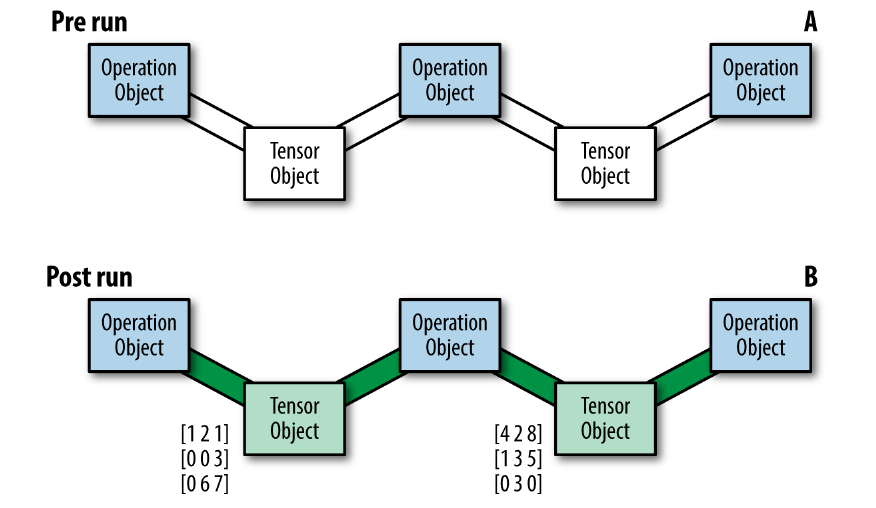

A : run 하기 전 / B : run 한 후(data flows through the graph)

In [54]:
c = tf.constant(4.0)
print(c)

# c는 Const_52:0라고 지정된 32-bit floating-point scalar Tensor object로 저장되어 있다.

Tensor("Const_47:0", shape=(), dtype=float32)


# Setting Attributes
*  Tensorflow Attribute : name, shape, dtype(identify와 object의 특징을 설정하는데 도움을 줌)
  - 이 attributes는 node를 만들 때 선택적인 사항이고, attribute를 설정하지 않았을 때는 TensorFlow에서 자동적으로 설정한다.
  - ops로 생성한다.(ops : source operations)
  - source operations : input data 생성


# Data Types
*  그래프를 지나는 data의 기본 단위 : numerical, Boolean, string
   - data의 type을 특정해주지 않으면 TensorFlow에서 자동으로 type을 지정한다.
   - dtype : data의 type을 볼 수 있다.

In [55]:
c = tf.constant(4.0, dtype=tf.float64)
print(c)
print(c.dtype)

Tensor("Const_48:0", shape=(), dtype=float64)
<dtype: 'float64'>


# Casting
* Tensor Object의 data type을 바꾸고 싶으면 tf.cast() operation을 사용하면 된다.

* TensorFlow의 data type은 아래 표와 같다.
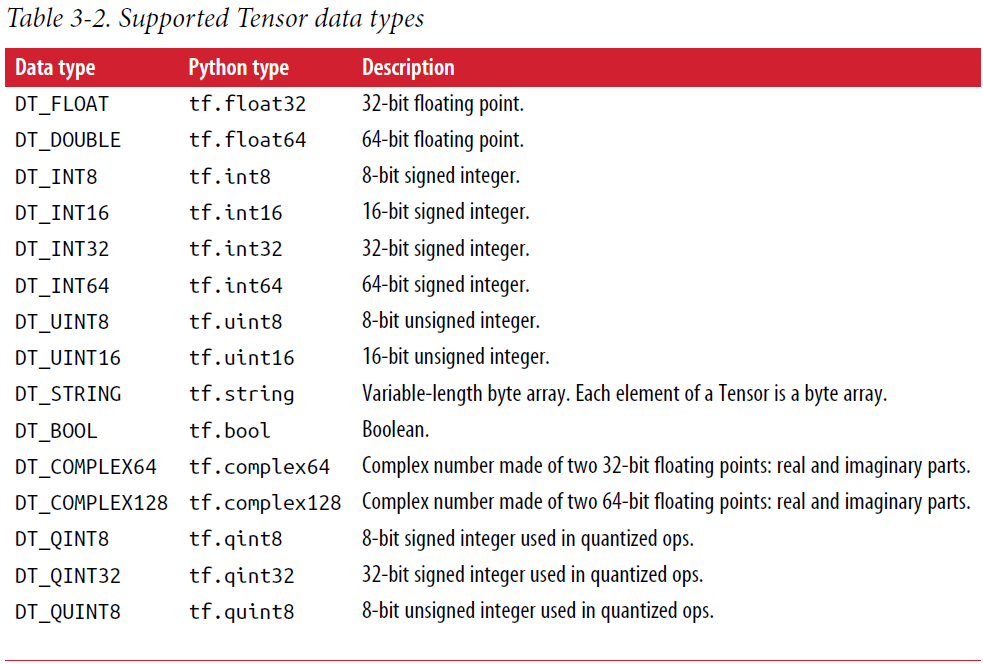

In [56]:
x = tf.constant([1,2,3], name = 'x', dtype=tf.float32)
print(x.dtype)
x = tf.cast(x, tf.int64)
print(x.dtype)

<dtype: 'float32'>
<dtype: 'int64'>


# Tensor Arrays and Shapes
* tensor : Python API의 object 이름으로도 쓰이지만, n차원 배열에서 사용하는 수학적 용어이기도 함


  - 1x1 tensor : 스칼라
  - 1xn tensor : 벡터
  - nxn tensor : 행렬
  - nxnxn tensor : 3차원 배열
  모든 이 data 단위들이 그래프에서 tensor로 다뤄짐

  TensorFlow object에서 불리는 Tensor와 이 수학적 tensor를 구분하기 위해 대문자, 소문자를 다르게 표시한다.

* dtype : data의 shape을 자동으로 포함
* Random-number 생성자 : 또 다른 type의 source operation이다.
  - initialize constant에 매우 유용(constant 값 채우기, 랜덤 숫자 생성하기, 연속적인 숫자 만들 때)
  - tf.random.normal()

In [57]:
import numpy as np
c = tf.constant([[1,2,3],
                 [4,5,6]])
print("Python List input: {}".format(c.get_shape()))
#get_shape() : tensor의 shape을 정수값의 tuple 형태로 리턴하고, 정수 각각은 배열의 entry이다.


c = tf.constant(np.array([
                          [[1,2,3],
                           [4,5,6]],
                          [[1,1,1],
                           [2,2,2]]
                        ]))

print("3d NumPy array input: {}".format(c.get_shape()))

Python List input: (2, 3)
3d NumPy array input: (2, 2, 3)


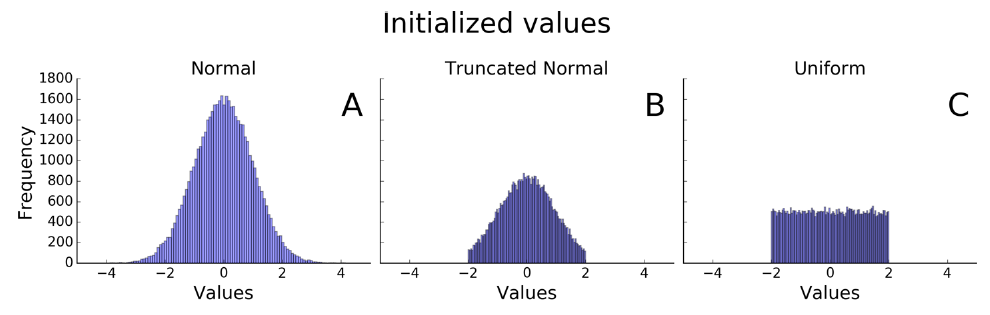

In [58]:
sess = tf.InteractiveSession()
c = tf.linspace(0.0, 4.0, 5)
print("The content of 'c' : \n {}\n".format(c.eval()))
sess.close()

The content of 'c' : 
 [0. 1. 2. 3. 4.]





> 다음은 useful initializer를 표로 나타낸 것이다.
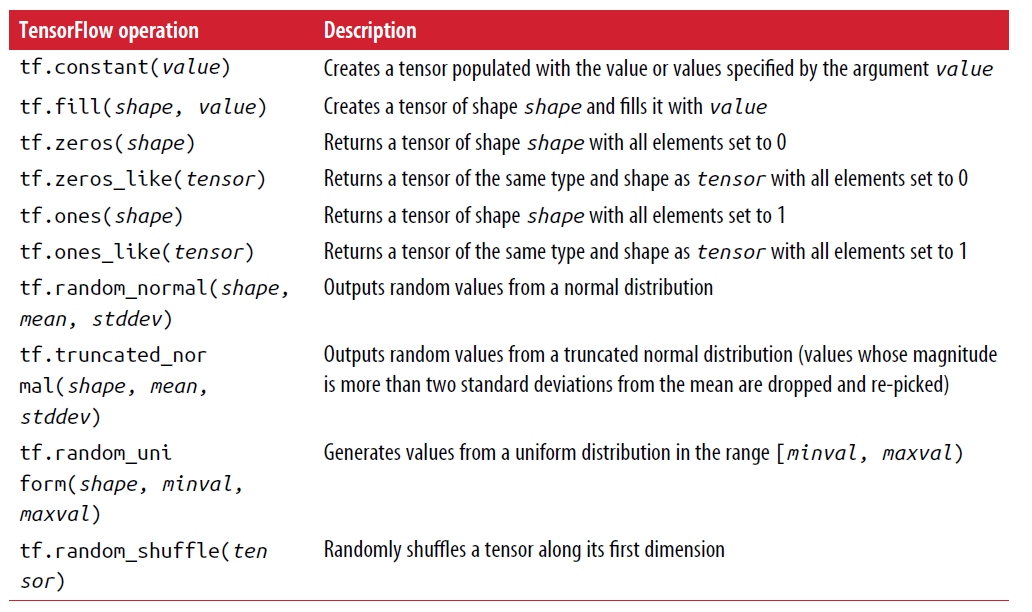



# Matrix multiplication


In [59]:
# 행렬 A 생성
A = tf.constant([ [1,2,3],
                  [4,5,6] ])
print(A.get_shape())

# Vector x 생성 
x = tf.constant([1,0,1])
print(x.get_shape())

(2, 3)
(3,)


In [60]:
# 위의 행렬 A와 벡터 x를 곱하려면 x에 dimension을 추가해야 함(1D Vector → 2D single-column matrix)
# tf.expand_dims : 다른 차원을 추가하는 함수
x = tf.expand_dims(x, 1)
print(x.get_shape())

b = tf.matmul(A, x)

sess = tf.InteractiveSession()
print('matmul result:\n {}'.format(b.eval()))
sess.close()

(3, 1)
matmul result:
 [[ 4]
 [10]]


배열을 뒤집고 싶을 경우(ex. column 벡터를 row 벡터로 바꾸고 싶거나 row 벡터를 column 벡터로 바꾸고 싶을 경우에) : tf.transpose()

# Names
* Tensor Object는 identifying name이 있다.
  - 고유한 string 이름(variable의 이름과 혼동하지 말아야 함)
  - dtype의 경우 object의 이름을 보려면 .name을 사용하면 됨

* duplicate names
  - 같은 그래프를 복사해도 같은 이름을 가질 수 없다(TensorFlow에서 이를 금지함)
  - 같은 그래프 복사 시 자동으로 _와 숫자를 추가하여 두 개의 그래프를 구분한다.
  - 다른 그래프일 경우 같은 이름을 가질 수 있다.

In [61]:
with tf.Graph().as_default():
  c1 = tf.constant(4, dtype=tf.float64, name='c')
  c2 = tf.constant(4, dtype=tf.int32, name='c')

print(c1.name)
print(c2.name)

#tensor의 index도 output에 나옴

c:0
c_1:0


# Name Scopes (이름의 범위)
* 크고 복잡한 그래프를 다룰 때, node grouping을 생성하여 follow와 manage하게 만들고 싶을 수 있다.
  - 이름별로 노드를 계층적으로 그룹화 할 수 있다.
  - tf.name_scope("prefix") 를 with와 함께 쓰면 된다
  - prefix는 그래프를 의미 있는 subgraph들로 나눌 때 유용하다.

이 부분은 나중에 그래프 구조를 시각화 할 때 사용된다.

In [62]:
# prefix_name 범위 안에 c2, c3 변수가 포함되어 그룹화되어있음
with tf.Graph().as_default():
  c1 = tf.constant(4, dtype=tf.float64, name='c')
  with tf.name_scope("prefix_name"):
    c2 = tf.constant(4, dtype=tf.int32, name='c')
    c3 = tf.constant(4, dtype=tf.float64, name='c')

print(c1.name)
print(c2.name)
print(c3.name)

c:0
prefix_name/c:0
prefix_name/c_1:0


# Variables, Placeholders, and Simple Optimization
* Tensor object에서 두 가지 중요한 type인 Variable과 placeholders에 대해 다루고, optimization을 다룬다.
* 모델을 최적화하기 위한 기본 요소를 빠르게 이야기 한 후 간단한 데모를 해본다.

# Variables
* 최적화 과정에는 주어진 모델의 파라미터를 조절하는 것이 필요하다.
* 파라미터를 조절하기 위한 목적으로 TensorFlow는 특별한 object를 사용하는데 이것이 Variables이다.
* 다른 object들은 session을 run 할 때 data가 다시 채워지지만, Variables는 ***그래프에서 고정된 상태를 유지***한다.
* 그래프에서 다른 operation의 input으로 쓰일 수 있다.

1. tf.Variable() : Variable 생성 및 정의(initialize)
2. tf.global_variables_intializer() : session을 run하여 초기화 작업 수행(메모리 할당, 초깃값 설정)

* 모델이 run 할 때만 계산된다.

In [63]:
init_val = tf.random_normal((1,5),0,1)
var = tf.Variable(init_val, name='var') # 같은 변수를 다시 사용하고 싶을 때는 tf.get_variables()를 사용하면 됨
print("pre run : \n{}".format(var))

init = tf.global_variables_initializer()
with tf.Session() as sess:
  sess.run(init)
  post_var = sess.run(var)

print("\npost run : \n{}".format(post_var))

pre run : 
<tf.Variable 'var:0' shape=(1, 5) dtype=float32_ref>

post run : 
[[-1.3234382   0.40205038  0.00792237  1.1107845   0.38017935]]


# Placeholders
* input data를 공급하기 위한 built-in 구조 (TensorFlow엔 placeholder로 지정되어 있음)
* 나중에 data로 채워질 empty Variables라고 생각할 수 있다.
* 그래프를 처음으로 만들 때와 input data와 함께 공급을 실행할 때 사용한다.
* shape은 선택적이다. (shape 값을 주지 않으면 placeholder는 아무 사이즈로 설정)
  - matrix의 차원은 주로 None으로 두고(주로 row 값), feature의 길이는 고정됨(주로 column)

In [64]:
ph = tf.placeholder(tf.float32, shape=(None, 10))

In [69]:
# placeholder는 two input 가짐(matrix x, vector w)
x_data = np.random.randn(5, 10)
w_data = np.random.randn(10, 1)

with tf.Graph().as_default():
  x = tf.placeholder(tf.float32, shape=(5,10))
  w = tf.placeholder(tf.float32, shape=(10,1))
  b = tf.fill((5, 1), -1.)
  xw = tf.matmul(x, w)

  xwb = xw + b
  s = tf.reduce_max(xwb) # 5-unit vector를 single scalar로 줄여줌
  with tf.Session() as sess:
    outs = sess.run(s, feed_dict={x: x_data, w: w_data})

print("outs = {}".format(outs))

outs = 5.684254169464111


# Optimization



# Training to predict
* target variable y와 feature vector x를 연관시켜줄 모델을 선택한다
* training data point는 모델을 tuning 하는데 사용함

# Simple regression problem
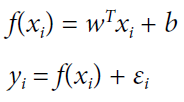

regression model은 위와 같다.

* input data와 output data에 적절한 placeholders를 생성하고, weights를 위한 Variables를 생성하고 intercept 한다.

In [70]:
x = tf.placeholder(tf.float32, shape=[None, 3])
y_true = tf.placeholder(tf.float32, shape=None)
w = tf.Variable([[0, 0, 0]], dtype = tf.float32, name='weights')
b = tf.Variable(0, dtype = tf.float32, name = 'bias')

In [71]:
# placeholder와 Variable이 정의되고 나면 model에 대해 쓴다.
# y_pred : 예측한 output(input x 값이 들어있는 matrix와 가중치 w의 곱셈에 편향값 b를 더한 결과)
y_pred = tf.matmul(w, tf.transpose(x)) + b

# Defining Loss Function
* 모델 성능 평가
  - 예측값과 실제 target의 차이를 발견하면, 이 차이를 반영하여 측정하는 것이 필요하다.
  - 이 차이는 objective나 loss 함수에 언급되고, 이 값을 최소화 시키는 parameter를 찾는 것이 모델을 최적화하는 것이다.

* MSE
  - 가장 흔하게 사용되는게 MSE
  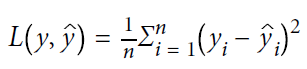

  tf.square() : vector의 차이를 제곱하는데 사용
  tf.reduce_mean() : 차이의 제곱을 평균을 구할 때 사용

In [72]:
loss = tf.reduce_mean(tf.square(y_true-y_pred))

* cross entropy
  - categorical data에서 자주 사용
  - softmax classifier에서 사용했음
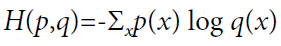



In [73]:
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels = y_true, logits = y_pred)
loss = tf.reduce_mean(loss)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


  - 두 개의 분포에서 유사점을 측정
  - 두 개의 분포가 유사할수록 cross entropy는 더 작아짐

# Gradient descent optimizer
